# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

In [ ]:
print(cities[0])

In [11]:
import json
url = "https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid="+weather_api_key
response=requests.get(url).json()
print(json.dumps(response, indent = 4))

{
    "coord": {
        "lon": -0.13,
        "lat": 51.51
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 294.73,
        "feels_like": 290.21,
        "temp_min": 293.15,
        "temp_max": 296.15,
        "pressure": 1025,
        "humidity": 45
    },
    "visibility": 10000,
    "wind": {
        "speed": 6.2,
        "deg": 80
    },
    "clouds": {
        "all": 8
    },
    "dt": 1586442410,
    "sys": {
        "type": 1,
        "id": 1414,
        "country": "GB",
        "sunrise": 1586409413,
        "sunset": 1586458000
    },
    "timezone": 3600,
    "id": 2643743,
    "name": "London",
    "cod": 200
}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
list_weather=[]
i = 1
for city in cities:
    url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q=" + city + "&appid=" + weather_api_key
    try:
        response = requests.get(url).json()
        latitude = response['coord']['lat']
        longitude= response['coord']['lon']
        temperature =response['main']['temp']
        humidity = response['main']['humidity']
        wind_speed= response['wind']['speed']
        cloudiness= response['clouds']['all']
        country =response['sys']['country']
        list_weather.append({"city":city,"City Id":i, "Country":country,"Latitude":latitude, "Longitude":longitude,
                             "Temperature":temperature, "Humidity":humidity, 
                         "Wind Speed":wind_speed,
                       "Cloudiness":cloudiness})
        i+= 1
    except:
        print("Value not found for city " +city)

list_weather  
    

Value not found for city scottsburgh
Value not found for city tasbuget
Value not found for city wulanhaote
Value not found for city marcona
Value not found for city attawapiskat
Value not found for city nizhneyansk
Value not found for city tsihombe
Value not found for city taolanaro
Value not found for city amderma
Value not found for city barentsburg
Value not found for city illoqqortoormiut
Value not found for city puerto pinasco
Value not found for city vaitupu
Value not found for city aybak
Value not found for city el mahalla el kubra
Value not found for city bolshoye sorokino
Value not found for city mys shmidta
Value not found for city matsanga
Value not found for city harigue
Value not found for city borlange
Value not found for city dubenskiy
Value not found for city palabuhanratu
Value not found for city kytlym
Value not found for city jiddah
Value not found for city yian
Value not found for city mendahara
Value not found for city grand river south east
Value not found for cit

[{'city': 'kutum',
  'City Id': 1,
  'Country': 'SD',
  'Latitude': 14.2,
  'Longitude': 24.67,
  'Temperature': 92.79,
  'Humidity': 8,
  'Wind Speed': 10.42,
  'Cloudiness': 68},
 {'city': 'mataura',
  'City Id': 2,
  'Country': 'NZ',
  'Latitude': -46.19,
  'Longitude': 168.86,
  'Temperature': 53.01,
  'Humidity': 90,
  'Wind Speed': 7,
  'Cloudiness': 93},
 {'city': 'carnarvon',
  'City Id': 3,
  'Country': 'AU',
  'Latitude': -24.87,
  'Longitude': 113.63,
  'Temperature': 78.8,
  'Humidity': 83,
  'Wind Speed': 12.75,
  'Cloudiness': 90},
 {'city': 'hasaki',
  'City Id': 4,
  'Country': 'JP',
  'Latitude': 35.73,
  'Longitude': 140.83,
  'Temperature': 46.67,
  'Humidity': 76,
  'Wind Speed': 14.99,
  'Cloudiness': 75},
 {'city': 'atar',
  'City Id': 5,
  'Country': 'MR',
  'Latitude': 20.52,
  'Longitude': -13.05,
  'Temperature': 102.85,
  'Humidity': 7,
  'Wind Speed': 9.8,
  'Cloudiness': 0},
 {'city': 'velizh',
  'City Id': 6,
  'Country': 'RU',
  'Latitude': 55.61,
  'Long

In [13]:
len(list_weather)

556

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#city_data.to_csv("CityData.csv")
city_data=pd.DataFrame(list_weather)
city_data


,city,City Id,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,kutum,1,SD,14.20,24.67,92.79,8,10.42,68
1,mataura,2,NZ,-46.19,168.86,53.01,90,7.00,93
2,carnarvon,3,AU,-24.87,113.63,78.80,83,12.75,90
3,hasaki,4,JP,35.73,140.83,46.67,76,14.99,75
4,atar,5,MR,20.52,-13.05,102.85,7,9.80,0
...,...,...,...,...,...,...,...,...,...
551,tawang,552,IN,27.58,91.87,40.44,29,0.81,64
552,nortelandia,553,BR,-14.45,-56.80,83.64,61,5.41,15
553,chumikan,554,RU,54.72,135.31,33.28,89,5.55,96
554,dingtao,555,CN,35.07,115.56,48.25,69,11.61,98


In [15]:
city_data.to_csv("CityData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

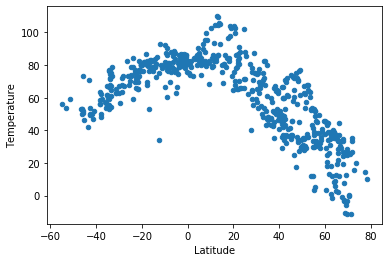

In [18]:
lat_temp_scatter= city_data.plot.scatter(x='Latitude', y ='Temperature')


#### Latitude vs. Humidity Plot

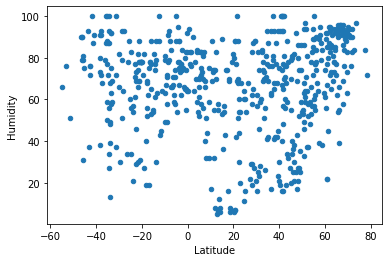

In [19]:
lat_humid_scatter= city_data.plot.scatter(x='Latitude', y ='Humidity')

#### Latitude vs. Cloudiness Plot

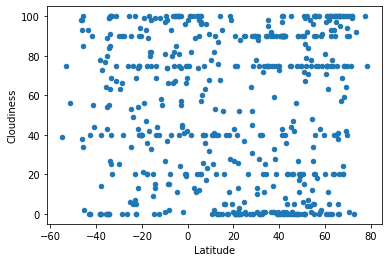

In [20]:
lat_cloud_scatter= city_data.plot.scatter(x='Latitude', y ='Cloudiness')

#### Latitude vs. Wind Speed Plot

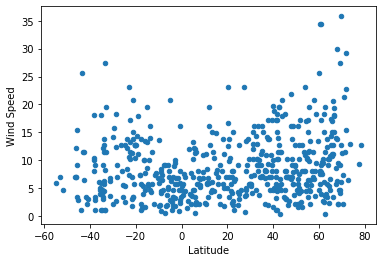

In [21]:
lat_wind_scatter= city_data.plot.scatter(x='Latitude', y ='Wind Speed')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [16]:
# Create Northern Hemisphere DataFrame
city_data_northern= city_data.loc[city_data['Latitude']>=0]
city_data_northern

,city,City Id,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,kutum,1,SD,14.20,24.67,92.79,8,10.42,68
3,hasaki,4,JP,35.73,140.83,46.67,76,14.99,75
4,atar,5,MR,20.52,-13.05,102.85,7,9.80,0
5,velizh,6,RU,55.61,31.20,49.05,77,11.65,100
7,coaldale,8,CA,49.72,-112.62,29.80,74,9.17,75
...,...,...,...,...,...,...,...,...,...
550,daye,551,CN,30.08,114.95,65.14,62,5.75,13
551,tawang,552,IN,27.58,91.87,40.44,29,0.81,64
553,chumikan,554,RU,54.72,135.31,33.28,89,5.55,96
554,dingtao,555,CN,35.07,115.56,48.25,69,11.61,98


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(6, 10, 'y = -1.1x + 97.98')

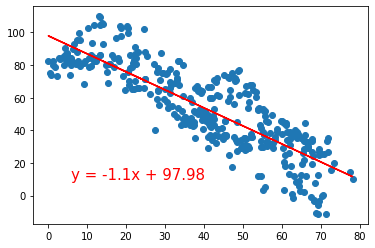

In [22]:
x_values = city_data_northern['Latitude']
y_values = city_data_northern['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [17]:
# Create Southern Hemisphere DataFrame
city_data_southern= city_data.loc[city_data['Latitude']<0]
city_data_southern

,city,City Id,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
1,mataura,2,NZ,-46.19,168.86,53.01,90,7.00,93
2,carnarvon,3,AU,-24.87,113.63,78.80,83,12.75,90
6,faanui,7,PF,-16.48,-151.75,82.02,78,10.09,80
8,atuona,9,PF,-9.80,-139.03,81.97,79,13.65,97
13,lufilufi,14,WS,-13.87,-171.60,80.60,88,16.11,75
...,...,...,...,...,...,...,...,...,...
534,dutlwe,535,BW,-23.98,23.90,84.40,21,12.26,49
539,kalabo,540,ZM,-14.97,22.68,76.68,55,8.55,9
544,piracanjuba,545,BR,-17.30,-49.02,79.50,62,1.48,89
547,dargaville,548,NZ,-35.93,173.88,57.15,79,6.08,77


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression